In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data reading

In [2]:
raw_data = pd.read_csv("raw_data.csv")

In [3]:
raw_data.head(8)

,Sales,Item
0,-0.515672,IT001
1,-1.916485,IT001
2,0.056180,IT001
3,0.890699,IT001
4,2.622610,IT001
5,0.364650,IT001
6,-1.663110,IT001
7,-3.824552,IT001


In [4]:
raw_data.tail(8)

,Sales,Item
1492,15.808775,IT001
1493,12.272530,IT001
1494,12.028359,IT001
1495,16.390593,IT001
1496,12.373120,IT001
1497,12.985960,IT001
1498,16.083739,IT001
1499,16.913528,IT001


### Train test split

Since the data is a sequence we cannot chose them randomly but to choose a cutoff of train data (80% first points).

In [5]:
n_points = 6 #lookback 
# train test split
split = int(0.8 * len(raw_data))
train = raw_data["Sales"].values[:split+n_points] #little overlaping, extra n_points, index split show first column, we need n_points more
test = raw_data["Sales"].values[split:]

## Building dataset for input to deep learinig

*n_points* (N) is lookback number. it shows how many previous time  points in sequence is taken to the sample (row) in training/testing data. last column  is a label. 

In [6]:
def make_input(data,n_points):
    '''
    Function generating the np.array with train/test points as an input for ML models
    '''
    n_rows = len(data)
    result = np.empty((n_rows - n_points,n_points))
    for i in range(n_rows-n_points):
                result[i,:] = data[i : i+n_points]
    return result

In [7]:
data = raw_data["Sales"].values
X_train  = make_input(train,n_points)
X_test = make_input(test,n_points)
y_train = raw_data["Sales"].values[n_points:split+n_points]
y_test = raw_data["Sales"].values[split+n_points:]

In [8]:
#data visualisation
column_name = [f"T_(N-{i})" for i in range(n_points,0,-1)]
Xtrn = pd.DataFrame(X_train,columns = column_name)
Xtrn["label T_N"] = y_train
Xtrn

,T_(N-6),T_(N-5),T_(N-4),T_(N-3),T_(N-2),T_(N-1),label T_N
0,-0.515672,-1.916485,0.056180,0.890699,2.622610,0.364650,-1.663110
1,-1.916485,0.056180,0.890699,2.622610,0.364650,-1.663110,-3.824552
2,0.056180,0.890699,2.622610,0.364650,-1.663110,-3.824552,-2.370070
3,0.890699,2.622610,0.364650,-1.663110,-3.824552,-2.370070,-4.999383
4,2.622610,0.364650,-1.663110,-3.824552,-2.370070,-4.999383,-5.038801
...,...,...,...,...,...,...,...
1195,1.408941,-1.086242,-1.933767,1.842369,1.815203,2.635313,2.740790
1196,-1.086242,-1.933767,1.842369,1.815203,2.635313,2.740790,0.616929
1197,-1.933767,1.842369,1.815203,2.635313,2.740790,0.616929,-0.385975
1198,1.842369,1.815203,2.635313,2.740790,0.616929,-0.385975,-1.706448


In [9]:
Xtst = pd.DataFrame(X_test,columns = column_name)
Xtst["label T_N"] = y_test
Xtst

,T_(N-6),T_(N-5),T_(N-4),T_(N-3),T_(N-2),T_(N-1),label T_N
0,2.635313,2.740790,0.616929,-0.385975,-1.706448,-3.401328,-1.424408
1,2.740790,0.616929,-0.385975,-1.706448,-3.401328,-1.424408,-5.251681
2,0.616929,-0.385975,-1.706448,-3.401328,-1.424408,-5.251681,-3.944976
3,-0.385975,-1.706448,-3.401328,-1.424408,-5.251681,-3.944976,-4.290969
4,-1.706448,-3.401328,-1.424408,-5.251681,-3.944976,-4.290969,-1.528838
...,...,...,...,...,...,...,...
289,11.788794,10.556777,14.539995,15.808775,12.272530,12.028359,16.390593
290,10.556777,14.539995,15.808775,12.272530,12.028359,16.390593,12.373120
291,14.539995,15.808775,12.272530,12.028359,16.390593,12.373120,12.985960
292,15.808775,12.272530,12.028359,16.390593,12.373120,12.985960,16.083739


### Scaling Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Building LSTM net

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,LSTM

In [13]:
model = Sequential()
#model.add(LSTM(4, input_shape=(1, n_points)))
model.add(LSTM(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape( (X_test.shape[0], 1, X_test.shape[1]))

In [15]:
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
1200/1200 - 1s - loss: 86.4289
Epoch 2/20
1200/1200 - 1s - loss: 28.8871
Epoch 3/20
1200/1200 - 1s - loss: 8.0923
Epoch 4/20
1200/1200 - 1s - loss: 6.8688
Epoch 5/20
1200/1200 - 1s - loss: 6.7047
Epoch 6/20
1200/1200 - 1s - loss: 6.5271
Epoch 7/20
1200/1200 - 1s - loss: 6.4869
Epoch 8/20
1200/1200 - 1s - loss: 6.3821
Epoch 9/20
1200/1200 - 1s - loss: 6.2964
Epoch 10/20
1200/1200 - 1s - loss: 6.2197
Epoch 11/20
1200/1200 - 1s - loss: 6.1678
Epoch 12/20
1200/1200 - 1s - loss: 6.0826
Epoch 13/20
1200/1200 - 1s - loss: 5.9734
Epoch 14/20
1200/1200 - 1s - loss: 5.9019
Epoch 15/20
1200/1200 - 1s - loss: 5.8308
Epoch 16/20
1200/1200 - 1s - loss: 5.7832
Epoch 17/20
1200/1200 - 1s - loss: 5.7939
Epoch 18/20
1200/1200 - 1s - loss: 5.7703
Epoch 19/20
1200/1200 - 1s - loss: 5.7690
Epoch 20/20
1200/1200 - 1s - loss: 5.6727


Loss function plot

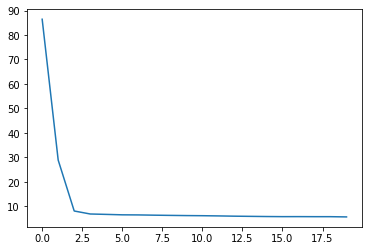

In [16]:
plt.plot(model.history.history["loss"])

## Model Evaluation

In [17]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [18]:
training_score

5.609509468078613

In [19]:
test_score

5.5338873863220215

In [20]:
test_predictions = model.predict(X_test)

In [21]:
summary = pd.DataFrame({"test" : y_test.reshape(-1,),
                        "prediction":test_predictions.reshape(-1,)})

In [22]:
summary

,test,prediction
0,-1.424408,-0.444020
1,-5.251681,-0.915869
2,-3.944976,-2.306037
3,-4.290969,-3.224212
4,-1.528838,-3.296328
...,...,...
289,16.390593,12.369729
290,12.373120,13.314830
291,12.985960,12.902926
292,16.083739,12.486352


In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#TODO find other metrics

In [24]:
mean_absolute_error(summary['test'],summary['prediction'])

1.9945492062270602

In [25]:
mean_squared_error(summary['test'],summary['prediction'])

5.533887793622951

Comparison of test data, prediction and relative error

REMARK: I used only one point ahead prediction

In [26]:
summary['rel_error'] = np.abs(summary['test']- summary['prediction']/summary['test'])

In [39]:
summary

,test,prediction,rel_error
0,-1.424408,-0.974080,2.108257
1,-5.251681,-1.392692,5.516871
2,-3.944976,-2.680241,4.624382
3,-4.290969,-3.645579,5.140562
4,-1.528838,-3.634652,3.906233
...,...,...,...
289,16.390593,12.304033,15.639917
290,12.373120,13.485767,11.283195
291,12.985960,13.084355,11.978383
292,16.083739,12.490599,15.307141


In [27]:
summary['rel_error'].mean()

9.714140240415977

In [28]:
summary['rel_error'].std()

5.104819701244548

#### Saving model to disc

In [29]:
from tensorflow.keras.models import load_model

In [30]:
model.save('lstm.h5')  # creates a HDF5 file 'my_model.h5'

In [31]:
later_model = load_model('lstm.h5')

## Random Forrest

For comparison, the same thing with Random Forest estimator

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(n_estimators=200)

In [34]:
rf.fit(X_train.reshape(-1,n_points),y_train)

RandomForestRegressor(n_estimators=200)

In [35]:
rf_prediction = rf.predict(X_test.reshape(-1,n_points))

In [36]:
rf_results = pd.DataFrame({'prediction': rf_prediction, 'test' : y_test})

In [37]:
rf_results ['rel_error'] = np.abs(rf_results['test']- rf_results['prediction']/rf_results ['test'])
rf_results

,prediction,test,rel_error
0,-1.237597,-1.424408,2.293258
1,-1.997437,-5.251681,5.632024
2,-2.123512,-3.944976,4.483259
3,-4.179360,-4.290969,5.264958
4,-3.733839,-1.528838,3.971111
...,...,...,...
289,13.788987,16.390593,15.549319
290,13.287946,12.373120,11.299183
291,13.654177,12.985960,11.934503
292,14.063802,16.083739,15.209328


In [38]:
rf_results['rel_error'].mean()

9.644863595483622

In [39]:
mean_squared_error(rf_results['test'],rf_results['prediction'])

5.92045924768025

## Questions:


1. HHH